In [1]:
#### IMPORTING LIBRARIES ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
#### READ & IDENTIFY DATA ####
path = "/test.csv"
data = pd.read_csv(path, header=None, names=["x", "y"])
X=data[["x"]]   # X is the input
y=data["y"]   # y is the output

In [15]:
#### DATA SHOW ####
# data.head()
# data.describe()
# data.info()
# data.plot(kind='scatter', x='first', y='second', figsize=(5,5)) #first method
# plt.scatter(data['first'],data['second']) #second method

computeCost(X, y, theta) =  24.73871783029357


Text(0.5, 1.0, 'Error vs. Training Epoch')

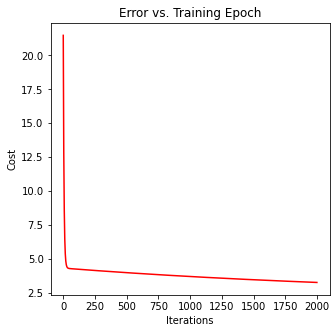

In [29]:
#### COST FUNCTION ####

# adding a new column called ones before the data
# data.insert(0, 'Ones', 1)

# separate X (training data) from y (target variable)
cols = data.shape[1]
X = data[['Ones','x']]  # iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))


def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
    summation=np.sum( np.power( ( (X * theta.T) - y ), 2 ) )
    m=len(X)
    return summation / (2 * m)

print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))


In [46]:
#### GRADIEN DESCENT ####
def gradientDescent(X, y, theta, alpha, iters):
    New_Theta   = np.matrix(np.zeros(theta.shape))
    parameters  = int(theta.ravel().shape[1])
    costs       = np.zeros(iters)
    m           = len(X)
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            New_Theta[0,j] = theta[0,j] - ((alpha / m) * np.sum(term))
            
        theta    = New_Theta
        costs[i] = computeCost(X, y, theta)
        
    return theta, costs
# initialize variables for learning rate and iterations
alpha = 0.001
iters = 2000

# perform gradient descent to "fit" the model parameters
New_theta, costs = gradientDescent(X, y, theta, alpha, iters)

print('NEW THETA = ' , New_theta) # final theta

print('Final Cost = ' , computeCost(X, y, New_theta)) # final cost


NEW THETA =  [[-1.37075559  0.84055919]]
Final Cost =  3.2723135191808543


Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

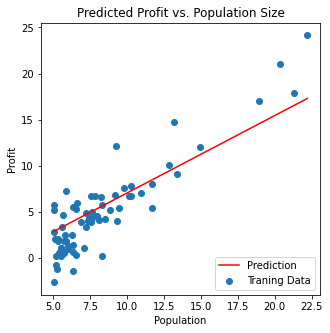

In [47]:
### BEST FIT LINE ###
feature= np.linspace(data.x.min(), data.x.max(), num=70)
Points_Best_Fit_line = ( (New_theta[0, 0]) + (New_theta[0, 1] * feature) )#teta0+theta1*x

###draw the line###

fig, shape = plt.subplots(figsize=(5,5))
shape.plot(feature, Points_Best_Fit_line, 'r', label='Prediction')
shape.scatter(x= data.x,y= data.y, label='Traning Data')
shape.legend(loc=4)#place of descipetion of prdect and train data
#describ the shape
shape.set_xlabel('Population')
shape.set_ylabel('Profit')
shape.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

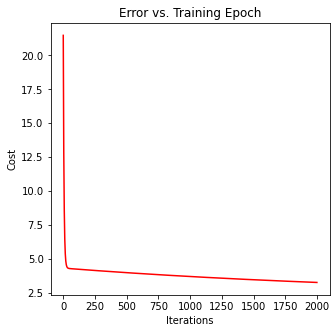

In [48]:
### draw error graph ###
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), costs, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')


In [49]:
### SPLIT DATA ###
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.33)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

In [50]:
model=LinearRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LinearRegression()

In [53]:
print((model.score(X_train,y_train))*100)

81.69391802258106


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [54]:
print((model.score(X_test,y_test))*100)

81.95152788079339


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [57]:
y_predect=model.predict(X_test)
print(f"values :\n{y_test}\n\n predect :\n{y_predect}")

values :
[[ 4.2415 ]
 [ 5.4974 ]
 [ 4.0259 ]
 [ 6.7981 ]
 [12.134  ]
 [-1.4211 ]
 [ 1.4233 ]
 [ 4.2885 ]
 [ 0.20421]
 [10.117  ]
 [ 6.5426 ]
 [ 7.7754 ]
 [ 2.8214 ]
 [ 0.61705]
 [ 1.8495 ]
 [ 7.2029 ]
 [ 6.6799 ]
 [ 3.3928 ]
 [12.054  ]
 [ 0.92695]
 [ 2.4756 ]
 [24.147  ]
 [ 0.67861]
 [ 1.2784 ]]

 predect :
[[ 5.09862134]
 [ 2.65335241]
 [ 3.76207472]
 [ 5.84786494]
 [ 5.92471043]
 [ 2.65956785]
 [ 2.63007274]
 [ 3.86310395]
 [ 1.33680823]
 [ 9.97921448]
 [ 4.75270359]
 [ 7.04100429]
 [ 1.1910278 ]
 [ 1.61763332]
 [ 2.13170709]
 [ 2.10786238]
 [ 6.9279962 ]
 [ 1.80906901]
 [12.32074199]
 [ 2.256242  ]
 [ 2.56385001]
 [20.56468174]
 [ 2.65595159]
 [ 2.26098834]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [40]:
y_test

matrix([[ 7.7754 ],
        [ 0.55657],
        [ 6.7318 ],
        [ 5.1694 ],
        [ 1.0463 ],
        [12.134  ],
        [ 1.4233 ],
        [ 5.4974 ],
        [ 6.7504 ],
        [ 0.152  ],
        [ 9.0551 ],
        [ 3.9115 ],
        [ 5.4141 ],
        [14.692  ],
        [ 1.0179 ],
        [ 4.1164 ],
        [ 0.92695],
        [ 2.4406 ],
        [-0.74279],
        [ 5.7014 ],
        [ 2.4756 ],
        [ 1.8451 ],
        [ 0.61705],
        [ 0.20421]])